# Data Wrangling
Data Wrangling is the process of cleaning, transforming, and organiing data so that it can be used for analysis and visualization. It is an important step in data analysis process as raw material is incomplete, inconsistent, and in an unstructured format, which can make it difficult to work it.
- Data wrangling helps to make th data more  consistent and useful for analysis and descision making. 

# Steps 
1- Gathering Data\
2- Tools to clean data (kis  sy clean krna)\
3- How to do,  (kaisy kren clean data ko)


In [1]:
# we're doing first step to perform 
# liraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# now we're accessing the data 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
# in this we've to remove deck 
df.drop(columns='deck',inplace=True)

In [9]:
df['age'].fillna(df['age'].mean())
df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'].fillna(df['embark_town'].mode()[0])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [10]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Outliers Removal

# Visualization Wala Method 

<Axes: ylabel='age'>

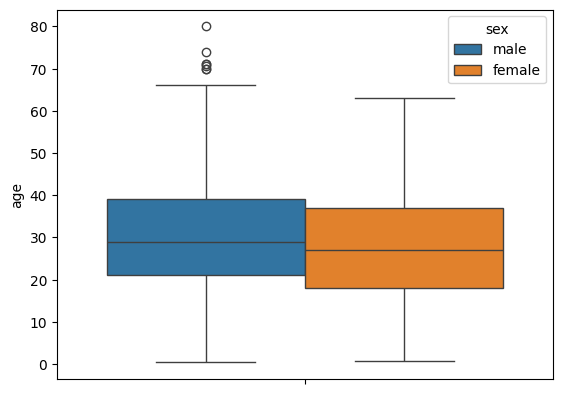

In [11]:
import seaborn as sns 
sns.boxplot(data=df,y='age',hue='sex')

In [12]:
# IQR method (inter quartile range)
# is mei 
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)] 


In [13]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 = 1.5*IQR
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)] 


<Axes: xlabel='fare', ylabel='Count'>

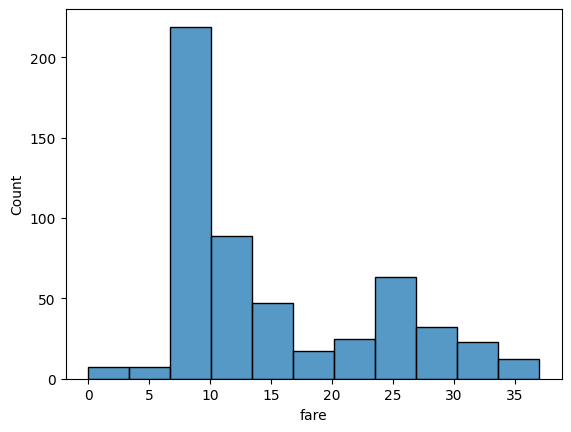

In [14]:
# ab hm isko check krty hai hist plot 
sns.histplot(df['fare'])

<Axes: xlabel='age', ylabel='Count'>

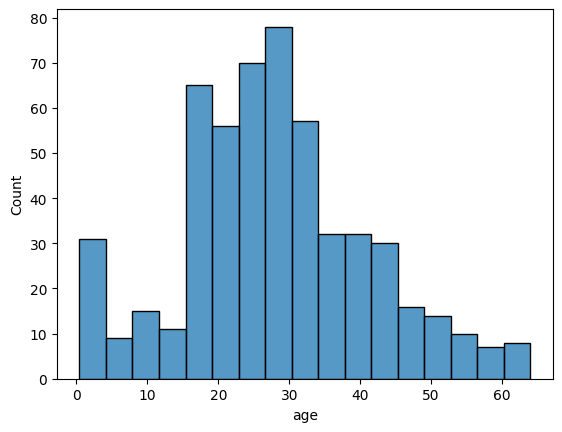

In [15]:
sns.histplot(df['age'])

In [16]:
df.shape

(541, 14)

In [17]:
# assignment 
# Z-Score method 
# pip install scipy 
# from scipy import stats 
# import numpy as np 
# zscore = np.abs(stats.zscore(df['age']))
# threshold =  3 
# df = df[(z< threshold).all(axis=1)]

# Finding and Dropping Duplicates 

In [18]:
# kitny duplicates hai ye check krny ky liye 
df1 = df[df.duplicated()]


In [19]:
df1.shape

(36, 14)

In [20]:
# finding and dropping duplicates 
# find duplicates 
df.duplicated().sum()

np.int64(36)

In [21]:
# removing duplicates 
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(505, 14)

# Data Normalization
To bring data at one scale 

In [23]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
#1. import libraries
# pip install scikit-learn
# for data normalization we use two libraries 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
#2.  data 
df 
# 3. select cloumns to normalize 
cols_to_normalize = ['age','fare']
# 4. creating a scaler function 
scaler =  MinMaxScaler()

# 5. fit and transform data over scaler or vice versa 
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.339415,1,0,0.195924,S,Third,man,True,Southampton,no,False
2,1,3,female,0.402328,0,0,0.214165,S,Third,woman,False,Southampton,yes,True
4,0,3,male,0.543882,0,0,0.217543,S,Third,man,True,Southampton,no,True
7,0,3,male,0.024851,3,1,0.569530,S,Third,child,False,Southampton,no,False
8,1,3,female,0.418056,0,2,0.300866,S,Third,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,0.433784,0,0,0.283752,S,Second,man,True,Southampton,no,True
885,0,3,female,0.606795,0,5,0.787073,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.292230,0,0,0.810719,S,First,woman,False,Southampton,yes,True
889,1,1,male,0.402328,0,0,0.810719,C,First,man,True,Cherbourg,yes,True


In [25]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.350495,2.532673,0.435497,0.425743,0.384158,0.412156
std,0.477598,0.660253,0.210280,0.846873,0.823120,0.236758
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.307958,0.000000,0.000000,0.213376
50%,0.000000,3.000000,0.418056,0.000000,0.000000,0.337124
75%,1.000000,3.000000,0.559610,1.000000,0.000000,0.648575
max,1.000000,3.000000,1.000000,4.000000,5.000000,1.000000


In [26]:
# agr hmny yehi standardscaler pr krna ho to sirf minmax scaler ka nam hi change kren gy 
#1. import libraries
# pip install scikit-learn
# for data normalization we use two libraries 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#2.  data 
df 
# 3. select cloumns to normalize 
cols_to_normalize = ['age','fare']
# 4. creating a scaler function 
scaler =  StandardScaler()

# 5. fit and transform data over scaler or vice versa 
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.457379,1,0,-0.914212,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.157896,0,0,-0.837090,S,Third,woman,False,Southampton,yes,True
4,0,3,male,0.515942,0,0,-0.822808,S,Third,man,True,Southampton,no,True
7,0,3,male,-1.954796,3,1,0.665362,S,Third,child,False,Southampton,no,False
8,1,3,female,-0.083025,0,2,-0.470526,S,Third,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,-0.008154,0,0,-0.542883,S,Second,man,True,Southampton,no,True
885,0,3,female,0.815425,0,5,1.585115,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.681992,0,0,1.685088,S,First,woman,False,Southampton,yes,True
889,1,1,male,-0.157896,0,0,1.685088,C,First,man,True,Cherbourg,yes,True


# standard deviation ki equation ye hai 
x_stand = (x-mean(x))/ std(x)\
 Where:\
 x is original variable\
 x_stand is the standardrized  variable\
 mean(x) is the mean of the  variable x\
 std(x) is the standard deviation of the variable x 

# Log Transformation 

In [27]:
kashti = sns.load_dataset('titanic')
kashti.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


is mei hmny 2 kam aik sath krny hoty hai log transformation aur kahli values ko fillna ta kah outliers km aa sken  

pehly log transformation krty hai phir outliers remove krty hai 

In [28]:
kashti.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
import numpy as np 
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# now we'll do the log transformation at same time 
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare']) 
kashti.head()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


log leny sy values apny ap aik form mei aa jati hai based on our data 

<Axes: xlabel='sex', ylabel='fare'>

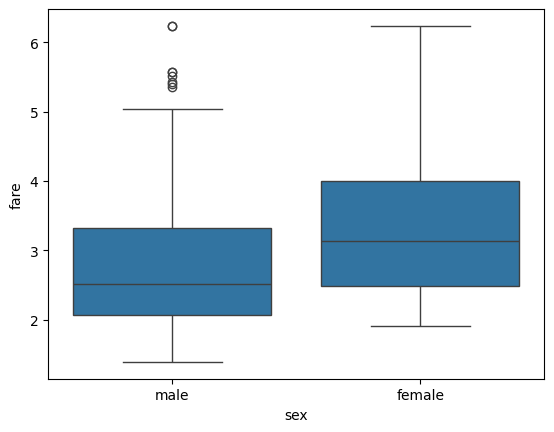

In [30]:
# ab hum box plot bna kr deikhty hai 
sns.boxplot(data=kashti, x='sex', y='fare')
# is mei ab outliers km hai as we've normalized data 


another way to normalize data is min-max method and standard scaller method 

<Axes: xlabel='age', ylabel='Count'>

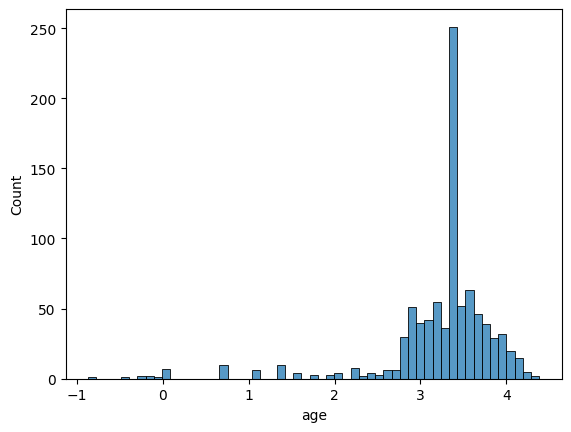

In [31]:
sns.histplot(data=kashti, x='age')
# hr method hr data ky lye theak nahi hota jaisy is mei ab log wala method age ky liye theak nahi hai 

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# Organizing data 

In [33]:
# i'm adding a new column
df['family_size'] = df['sibsp'] + df['parch'] 


<Axes: xlabel='family_size', ylabel='Count'>

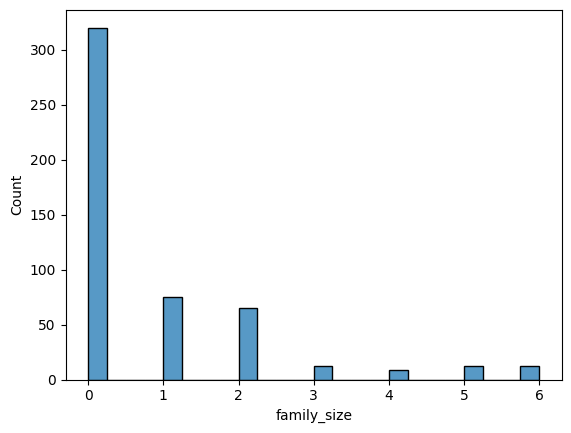

In [34]:
sns.histplot(data=df,x='family_size')

<Axes: xlabel='sex', ylabel='age'>

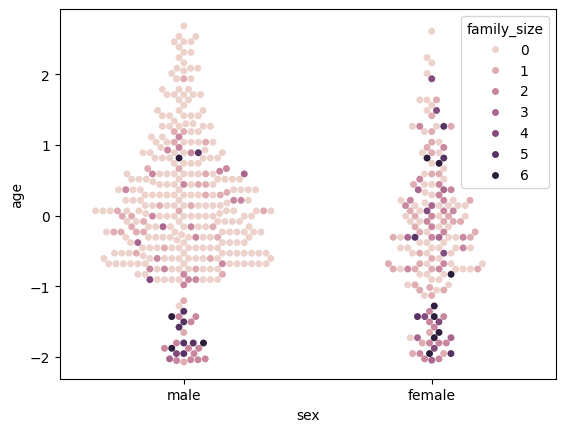

In [35]:
sns.swarmplot(data=df, x='sex',y='age',hue='family_size')

In [36]:
df = df.rename(columns={'survived':'survival'}) 
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [37]:
# ab  hum pivot table bnaty hai 
table = pd.pivot_table(df, values='fare', index='pclass',
        columns='survival', aggfunc=np.sum)
table


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\445300350.py:2: FutureWarning: The provided callable <function sum at 0x000001E74A327EC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df, values='fare', index='pclass',


survival,0,1
pclass,,
1,24.064769,36.039003
2,20.767084,40.659479
3,-88.822337,-32.707999


In [38]:
table = pd.pivot_table(df, values='age', index='pclass',
        columns='survival', aggfunc=np.sum)
table


C:\Users\HP\AppData\Local\Temp\ipykernel_1196\3785648566.py:1: FutureWarning: The provided callable <function sum at 0x000001E74A327EC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df, values='age', index='pclass',


survival,0,1
pclass,,
1,33.841244,18.222522
2,30.425725,-11.905329
3,-24.714416,-45.869746


<Axes: xlabel='age', ylabel='fare'>

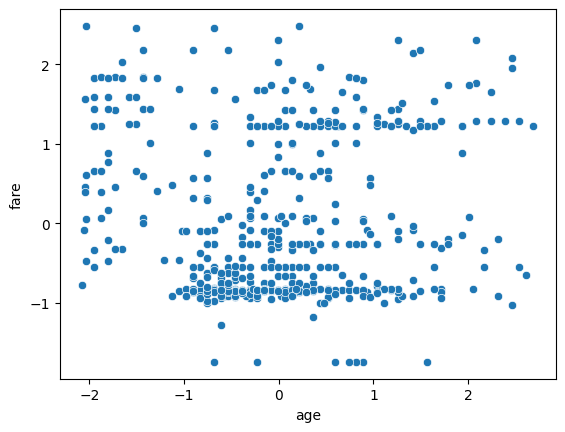

In [39]:
# phir hum is mei relation bhi check krty hai kah konsa relation bn rha hai 
sns.scatterplot(data=df, x='age',y='fare')

In [40]:
# phir hum iska corelation nikalny ki bhi koshish kren gy 
# e nd pr hmary pass aik data framebn jata hau clean krny ky bad wo deikhty hai wo kisa hai 
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.457379,1,0,-0.914212,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.157896,0,0,-0.837090,S,Third,woman,False,Southampton,yes,True,0
4,0,3,male,0.515942,0,0,-0.822808,S,Third,man,True,Southampton,no,True,0
7,0,3,male,-1.954796,3,1,0.665362,S,Third,child,False,Southampton,no,False,4
8,1,3,female,-0.083025,0,2,-0.470526,S,Third,woman,False,Southampton,yes,False,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survival     505 non-null    int64   
 1   pclass       505 non-null    int64   
 2   sex          505 non-null    object  
 3   age          505 non-null    float64 
 4   sibsp        505 non-null    int64   
 5   parch        505 non-null    int64   
 6   fare         505 non-null    float64 
 7   embarked     505 non-null    object  
 8   class        505 non-null    category
 9   who          505 non-null    object  
 10  adult_male   505 non-null    bool    
 11  embark_town  505 non-null    object  
 12  alive        505 non-null    object  
 13  alone        505 non-null    bool    
 14  family_size  505 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(5)
memory usage: 52.9+ KB


# Saving the Wrangled data 

In [ ]:
# always save in csv
df.to_csv("preprocessed_data.csv")
# apny ye bat yad rkhni hai kah apny data kaisy clean kia hai aur iskohum further machine learnig ky liye use krty hai 

In [ ]:
# this data is ready for analysis 
# line plot is used for time series anlysis 
# line plot factorization base pr bnta hai 
# andrew abella guide ss